# Jonathan Halverson
# Tuesday, May 30, 2017
# DFT and FFT

Fourier analysis - Decompose the signal into a linear combination of sinusiods with different frequencies. If the signal is composed of perfectly periodic functions then the transform will result in peaks. Consider a quantity that various with the seasons as well as the day like temperature. If you took years of data you should see one frequency around an inverse year and one around an inverse day. After transforming the data one can throw away the high and/or low frequencies for denoising, etc.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
def f(t, w=10*2*math.pi):
     return sum([n * math.cos(n * w * t) for n in range(1, 6)])

In [3]:
F = np.vectorize(f)

Let's use a 2 raised to the n as the number of points:

In [4]:
for n in range(1, 10):
     print n, 2**n

1 2
2 4
3 8
4 16
5 32
6 64
7 128
8 256
9 512


In [5]:
T = 0.5
N = 256 # half the total number of points
df = pd.DataFrame({'k':range(0, 2 * N)})
df['w'] = 2.0 * np.pi * df.index / T
df['t_k'] = df.index * T / (2 * N)

In [6]:
df

,k,w,t_k
0,0,0.000000,0.000000
1,1,12.566371,0.000977
2,2,25.132741,0.001953
3,3,37.699112,0.002930
4,4,50.265482,0.003906
5,5,62.831853,0.004883
6,6,75.398224,0.005859
7,7,87.964594,0.006836
8,8,100.530965,0.007812
9,9,113.097336,0.008789


Here is the original signal:

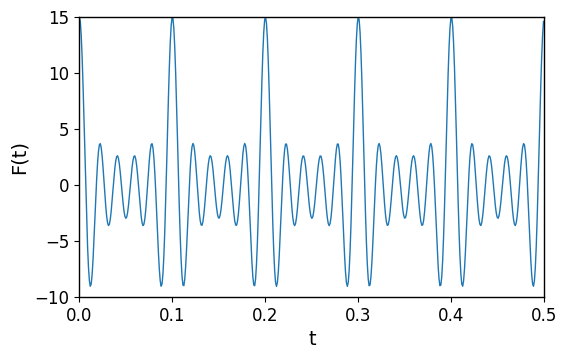

In [7]:
plt.plot(df.t_k, F(df.t_k))
plt.xlim(0, 0.5)
plt.ylim(-10, 15)
plt.xlabel('t')
plt.ylabel('F(t)')

We wish to find the underlying waves which when superposed produce the original signal. This is done by computing the DFT. In this case the number of samples is a power of 2 so we can use the FFT which has a computational complexity of N log N.

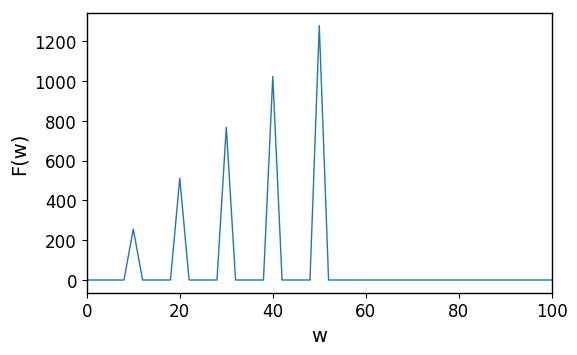

In [8]:
from numpy import fft

plt.plot(df.w / (2 * np.pi), fft.fft(F(df.t_k)).real)
plt.xlim(0, 100)
plt.xlabel('w')
plt.ylabel('F(w)')

We see the underlying frequencies of the original signal have been revealed, namely, 10, 20, 30, 40 and 50 Hertz.

### Explicit calculation

Here we repeat the calculation without using a library:

In [9]:
Fw = []
for w in df.w:
     sumt = 0.0 + 0.0j
     for k in df.k:
          t_k = k * T / (2 * N)
          sumt += F(t_k) * np.exp(1j * w * t_k)
     Fw.append(sumt / 2.0 / N)

In [10]:
Fw = Fw[:N]

In [11]:
Fw[:20]

[(-5.9327542878406803e-16+0j),
 (-6.4531713306337224e-16+1.8323016715005025e-16j),
 (-5.0653925498522767e-16-2.6270218639323772e-16j),
 (-6.6266436782314031e-16+1.5092094240998222e-16j),
 (-5.4123372450476381e-16+2.1120258320017626e-16j),
 (0.49999999999999944+1.6349768761081407e-16j),
 (-7.2164496600635175e-16-2.2681509448396753e-16j),
 (-7.5286998857393428e-16+5.2909066017292616e-17j),
 (-7.9103390504542404e-16+9.2374025095764978e-17j),
 (-7.9450335199737765e-16+3.8857805861880479e-16j),
 (0.99999999999999956-4.0332320816460765e-17j),
 (-1.672273430841642e-15+9.9746599868666408e-18j),
 (-4.6837533851373792e-16-1.9081958235744878e-17j),
 (-1.1449174941446927e-15+7.3899220076611982e-16j),
 (-1.8422763314873691e-15+3.903127820947816e-16j),
 (1.5000000000000002+1.5872719805187785e-16j),
 (6.6960326172704754e-16-1.5785983631388945e-16j),
 (-3.677613769070831e-16-1.0711917464156784e-15j),
 (2.1510571102112408e-16-3.903127820947816e-17j),
 (2.0677903833643541e-15-3.9898639947466563e-17j)]

In [12]:
np.array(Fw).real[:20]

array([ -5.93275429e-16,  -6.45317133e-16,  -5.06539255e-16,
        -6.62664368e-16,  -5.41233725e-16,   5.00000000e-01,
        -7.21644966e-16,  -7.52869989e-16,  -7.91033905e-16,
        -7.94503352e-16,   1.00000000e+00,  -1.67227343e-15,
        -4.68375339e-16,  -1.14491749e-15,  -1.84227633e-15,
         1.50000000e+00,   6.69603262e-16,  -3.67761377e-16,
         2.15105711e-16,   2.06779038e-15])

In [13]:
np.array(Fw).imag[:20]

array([  0.00000000e+00,   1.83230167e-16,  -2.62702186e-16,
         1.50920942e-16,   2.11202583e-16,   1.63497688e-16,
        -2.26815094e-16,   5.29090660e-17,   9.23740251e-17,
         3.88578059e-16,  -4.03323208e-17,   9.97465999e-18,
        -1.90819582e-17,   7.38992201e-16,   3.90312782e-16,
         1.58727198e-16,  -1.57859836e-16,  -1.07119175e-15,
        -3.90312782e-17,  -3.98986399e-17])

(0, 100)

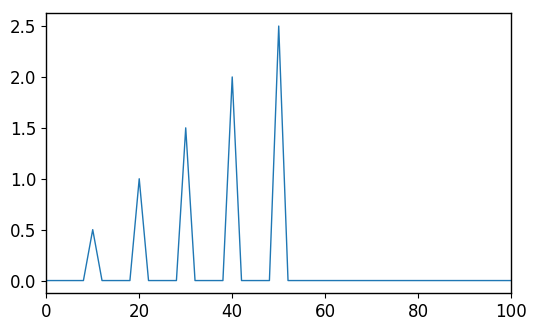

In [14]:
plt.plot(df.w[:N] / (2 * np.pi), np.array(Fw).real)
plt.xlim(0, 100)

(0, 100)

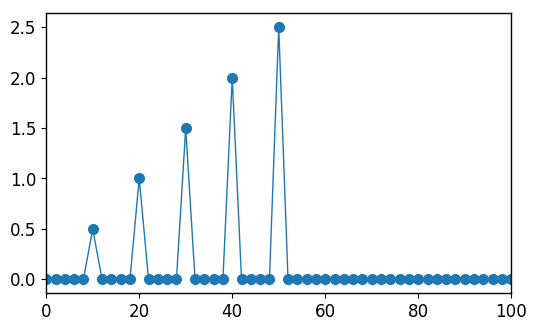

In [15]:
plt.scatter(df.w[:N] / (2 * np.pi), np.absolute(np.array(Fw)))
plt.plot(df.w[:N] / (2 * np.pi), np.absolute(np.array(Fw)))
plt.xlim(0, 100)

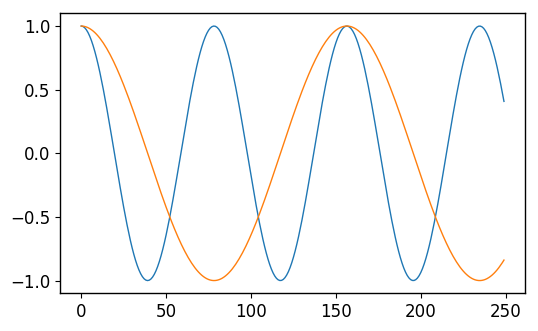

In [16]:
x = np.linspace(0, 10, 250)
plt.plot(np.cos(2*x))
plt.plot(np.cos(x))

In [17]:
from scipy import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
spec = fft(x)
spec

array([ 4.50000000+0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [18]:
a_m = spec.real
b_m = spec.imag
c_m = np.abs(spec)

In [19]:
x_again = ifft(spec)
x_again

array([ 1.0+0.j,  2.0+0.j,  1.0+0.j, -1.0+0.j,  1.5+0.j])